In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('risk_factors_cervical_cancer.csv')

In [3]:
data.shape

(858, 36)

In [4]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
data.replace('?',np.nan,inplace = True)

In [6]:
data= data.apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [7]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

<AxesSubplot:>

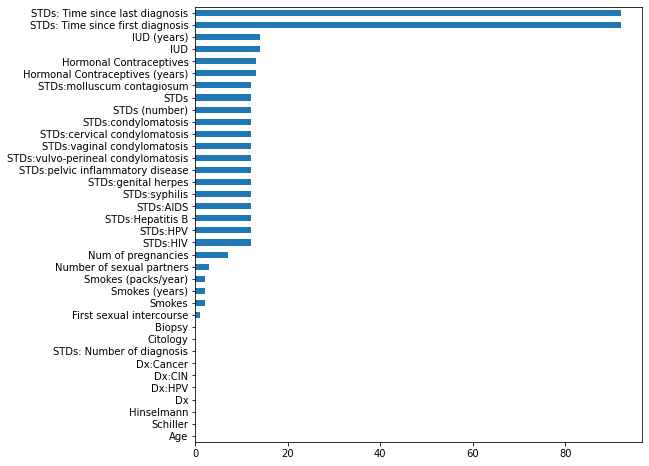

In [9]:
plt.figure(figsize=(8,8))
np.round(data.isnull().sum()/data.shape[0]*100).sort_values().plot(kind='barh')

In [10]:
#STDs Time since last diagnosis and STDs time since first diagnosis have 90% null values so they are dropped
data = data.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1)
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [11]:
X = data[data.columns[0:33]]
y = data['Biopsy']
imputer_median = SimpleImputer(strategy='median')

In [12]:
Features=[]
for col_name in X.columns:
        Features.append(col_name)

In [13]:
imp =imputer_median.fit_transform(X)
X_with_no_NaN = pd.DataFrame(imp,columns=Features)

In [14]:
X_with_no_NaN.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X_with_no_NaN.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [16]:
y.value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [17]:
X_with_no_NaN.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,1.201241,0.446278,0.686480,2.035331,0.096737,...,0.001166,0.002331,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282
std,8.497948,1.644759,2.791883,1.400981,0.350641,4.060623,2.210351,0.464194,3.567040,0.295771,...,0.034139,0.048252,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(X_with_no_NaN,y)

In [19]:
y_res.value_counts()

0    799
1    799
Name: Biopsy, dtype: int64

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res, test_size = 0.2, random_state = 42)

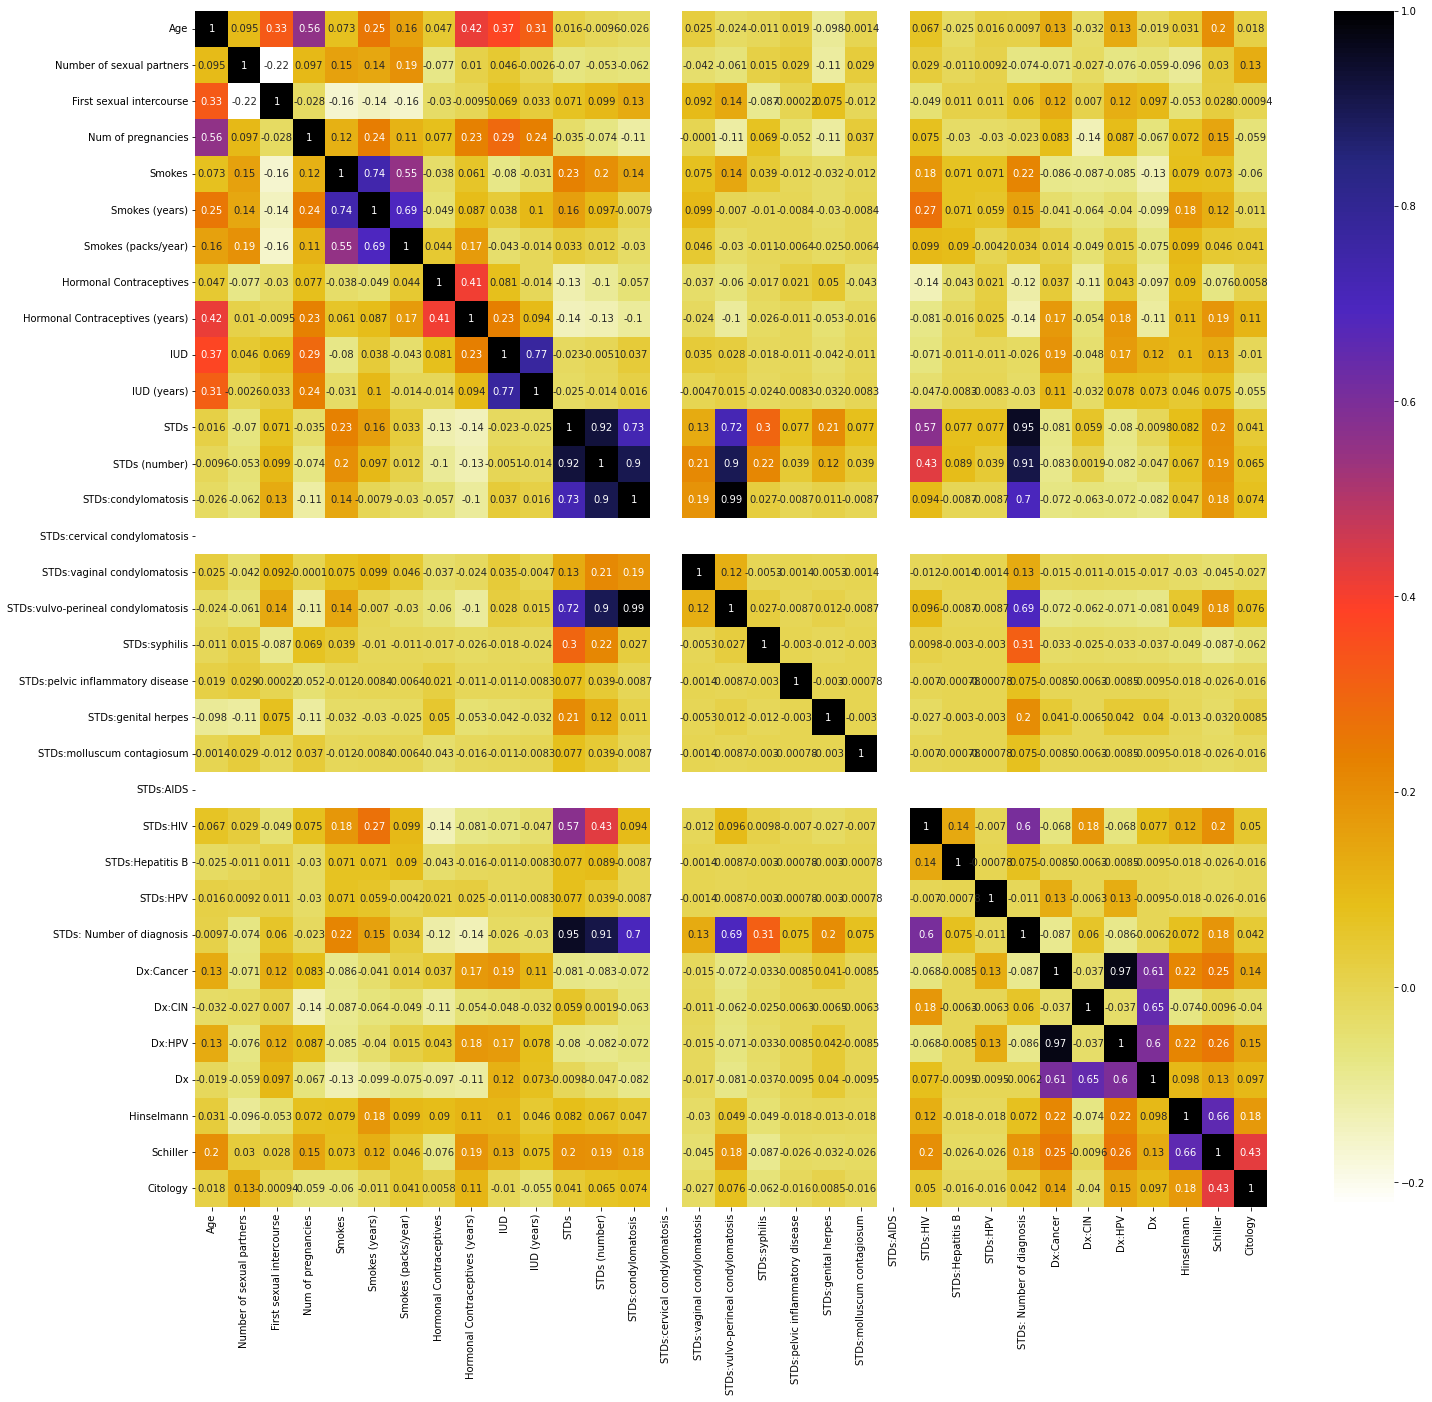

In [21]:
plt.figure(figsize=(24,22))
cor = x_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [22]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                columnname = corr_matrix.columns[i]
                col_corr.add(columnname)
    return col_corr

In [23]:
corr_features = correlation(x_train,0.8)
len(set(corr_features))

5

In [24]:
x_train.drop(corr_features,axis=1)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology
493,20.000000,1.000000,18.000000,1.000000,0.0,0.0,0.0,1.000000,0.500000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
354,19.000000,3.000000,13.000000,4.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
342,20.000000,1.000000,15.000000,1.000000,1.0,2.0,0.2,1.000000,0.500000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
834,35.000000,3.000000,18.000000,3.000000,0.0,0.0,0.0,1.000000,5.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
705,21.000000,2.000000,18.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,16.778591,1.389296,13.946478,2.000000,0.0,0.0,0.0,0.610704,0.256496,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.389296,0.0
1294,20.372689,3.372689,16.254623,1.627311,0.0,0.0,0.0,0.627311,0.156828,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.372689,1.0
860,21.574564,3.425436,15.000000,1.000000,0.0,0.0,0.0,0.574564,0.574564,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.574564,1.000000,1.0
1459,20.800587,1.000000,17.199413,1.800587,0.0,0.0,0.0,1.000000,5.193546,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.800587,0.800587,0.199413,0.199413,0.0


In [25]:
x_test.drop(corr_features,axis=1)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology
803,36.000000,2.000000,18.000000,2.000000,1.000000,19.000000,7.600000,1.000000,8.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
124,31.000000,3.000000,16.000000,4.000000,1.000000,10.000000,1.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
350,19.000000,4.000000,15.000000,2.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
682,46.000000,1.000000,15.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1325,25.970753,3.000000,15.058495,2.000000,0.000000,0.000000,0.000000,1.000000,0.322688,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.029247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,18.607737,1.000000,17.215474,1.000000,0.392263,0.784526,0.019613,0.607737,0.607737,0.0,...,0.0,0.0,0.0,0.0,0.607737,0.000000,0.607737,1.000000,1.000000,0.607737
1507,20.868273,1.000000,17.131727,1.868273,0.000000,0.000000,0.000000,1.000000,4.449002,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.868273,0.868273,0.131727,0.131727,0.000000
1155,17.739206,2.246402,15.492804,1.246402,0.000000,0.000000,0.000000,0.246402,0.061601,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.753598,0.753598,0.246402
963,28.000000,4.127876,17.616372,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.127876


In [26]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [28]:
print('Classification report for KNeighborsClassifier:')
print(metrics.classification_report(y_test, y_pred))
print('Confusion matrix (test)')
print (metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Classification report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       165
           1       0.93      1.00      0.96       155

    accuracy                           0.96       320
   macro avg       0.96      0.96      0.96       320
weighted avg       0.97      0.96      0.96       320

Confusion matrix (test)
[[153  12]
 [  0 155]]
Accuracy: 0.9625


In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [30]:
print('Classification report for LogisticRegression:')
print(metrics.classification_report(y_test, y_pred))
print('Confusion matrix (test)')
print (metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       165
           1       0.96      0.97      0.97       155

    accuracy                           0.97       320
   macro avg       0.97      0.97      0.97       320
weighted avg       0.97      0.97      0.97       320

Confusion matrix (test)
[[159   6]
 [  4 151]]
Accuracy: 0.96875


In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [32]:
print('Classification report for SVC:')
print(metrics.classification_report(y_test, y_pred))
print('Confusion matrix (test)')
print (metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Classification report for SVC:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       165
           1       0.96      0.99      0.97       155

    accuracy                           0.97       320
   macro avg       0.97      0.98      0.97       320
weighted avg       0.98      0.97      0.98       320

Confusion matrix (test)
[[159   6]
 [  2 153]]
Accuracy: 0.975


In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [34]:
print('Classification report for Kernel SVC:')
print(metrics.classification_report(y_test, y_pred))
print('Confusion matrix (test)')
print (metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Classification report for Kernel SVC:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       165
           1       0.96      0.99      0.97       155

    accuracy                           0.97       320
   macro avg       0.97      0.98      0.97       320
weighted avg       0.98      0.97      0.98       320

Confusion matrix (test)
[[159   6]
 [  2 153]]
Accuracy: 0.975


In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [36]:
print('Classification report for DecisionTreeClassifier:')
print(metrics.classification_report(y_test, y_pred))
print('Confusion matrix (test)')
print (metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Classification report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       165
           1       0.97      0.95      0.96       155

    accuracy                           0.97       320
   macro avg       0.97      0.97      0.97       320
weighted avg       0.97      0.97      0.97       320

Confusion matrix (test)
[[161   4]
 [  7 148]]
Accuracy: 0.965625


In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [38]:
print('Classification report for RandomForestClassifier:')
print(metrics.classification_report(y_test, y_pred))
print('Confusion matrix (test)')
print (metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       165
           1       0.97      0.97      0.97       155

    accuracy                           0.97       320
   macro avg       0.97      0.97      0.97       320
weighted avg       0.97      0.97      0.97       320

Confusion matrix (test)
[[161   4]
 [  5 150]]
Accuracy: 0.971875


SVc has the best accuracy of 0.975